# Lecture: Data Aquisition and Preparation
- Different types of data
- The fundamentals of Pandas
- Data preprocessing
- Data cleaning


## 01 Types of Data
- structured data: tables, entries have a well-defined and fixed data type, provides metadata
- unstructured data: data has no well-defined shape, metadata is not explicitly marked, data might be messy
- semi-structured data: not well-defined data model, contains markers for semantic structures, markers do not enforce a certain data type (eg. markup language like HTML)

## 02 Pandas: Introduction

In [1]:
import pandas as pd

#### DataFrame
- core of the library
- certain data can be stored as a data frame

In [2]:
import pandas as pd

columns = ["Transaction", "Product", "Price", "Quantity"]

data = [
    [0, "Beer", 0.89, 6],
    [0, "Chips", 1.99, 1],
    [1, "Milk", 1.20, 3],
    [2, "Bread", 2.55, 1],
]

df = pd.DataFrame(data=data, columns=columns)
df

,Transaction,Product,Price,Quantity
0,0,Beer,0.89,6
1,0,Chips,1.99,1
2,1,Milk,1.20,3
3,2,Bread,2.55,1


In [3]:
df.shape, df.columns, df.index

((4, 4),
 Index(['Transaction', 'Product', 'Price', 'Quantity'], dtype='object'),
 RangeIndex(start=0, stop=4, step=1))

#### access data

In [4]:
# Access columns
df["Price"]

0    0.89
1    1.99
2    1.20
3    2.55
Name: Price, dtype: float64

In [5]:
# Access rows
df.loc[0]

Transaction       0
Product        Beer
Price          0.89
Quantity          6
Name: 0, dtype: object

In [6]:
# Sorting based on specific columns
df.sort_values(by="Price", ascending=False)

,Transaction,Product,Price,Quantity
3,2,Bread,2.55,1
1,0,Chips,1.99,1
2,1,Milk,1.20,3
0,0,Beer,0.89,6


In [7]:
# Aggregating all rows with a specific value
df.groupby("Transaction")["Price"].sum()

Transaction
0    2.88
1    1.20
2    2.55
Name: Price, dtype: float64

In [8]:
# Counting unique values within columns
df.Transaction.value_counts()

0    2
1    1
2    1
Name: Transaction, dtype: int64

In [9]:
# Saving data in a variety of commonly used formats
df.to_csv("sales.csv", index=False)
df.to_excel("sales.xlsx", index=False)

In [10]:
# Loading data in various formats
df = pd.read_excel("sales.xlsx")
df

,Transaction,Product,Price,Quantity
0,0,Beer,0.89,6
1,0,Chips,1.99,1
2,1,Milk,1.20,3
3,2,Bread,2.55,1


## 03 Data Preprocessing
- data cleaning
- deduplication
- handling missing values

#### 0301 data cleaning

In [11]:
df = pd.read_csv("olympics.csv")
print(df.shape)
df

(150, 1)


,0;1;2;3;4;5;6;7;8;9;10;11;12;13;14;15
0,;? Summer;01 !;02 !;03 !;Total;? Winter;01 !;0...
1,Afghanistan (AFG);13;0;0;2;;0;0;0;0;0;13;0;0;2;2
2,Algeria (ALG);12;5;2;8;15;3;0;0;0;0;15;5;2;8;15
3,Argentina (ARG);23;18;24;28;70;18;0;0;0;0;41;1...
4,Armenia (ARM);5;1;2;9;12;6;0;0;0;0;11;1;2;9;12
...,...
145,Independent Olympic Participants (IOP) ;1;0;1;...
146,Zambia (ZAM) ;12;0;1;1;2;0;0;0;0;0;12;0;1;1;2
147,Zimbabwe (ZIM) ;12;3;4;1;8;1;0;;0;0;13;3;4;1;8
148,Mixed team (ZZX) ;3;8;5;4;17;0;0;0;0;0;3;8;5;4;17


- problem of the file: no real separation, only by semicolon
- solution: use separators

In [12]:
df = pd.read_csv("olympics.csv", sep=";")
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,NaN,? Summer,01 !,02 !,03 !,Total,? Winter,01 !,02 !,03 !,Total,? Games,01 !,02 !,03 !,Combined total
1,Afghanistan (AFG),13,0,0,2,NaN,0,0,0,0,0,13,0,0,2,2
2,Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
3,Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
4,Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Independent Olympic Participants (IOP),1,0,1,2,3,0,0,0,0,0,1,0,1,2,3
146,Zambia (ZAM),12,0,1,1,2,0,0,0,0,0,12,0,1,1,2
147,Zimbabwe (ZIM),12,3,4,1,8,1,0,NaN,0,0,13,3,4,1,8
148,Mixed team (ZZX),3,8,5,4,17,0,0,0,0,0,3,8,5,4,17


- another problem: the header is not displayed correctly 
- solution: remove the first abundant (dt. "überflüssig") line

In [13]:
df = pd.read_csv("olympics.csv", sep=";", header=1)
df

,Unnamed: 0,? Summer,01 !,02 !,03 !,Total,? Winter,01 !.1,02 !.1,03 !.1,Total.1,? Games,01 !.2,02 !.2,03 !.2,Combined total
0,Afghanistan (AFG),13,0,0,2,NaN,0,0.0,0.0,0.0,0,13,0,0.0,2,2
1,Algeria (ALG),12,5,2,8,15.0,3,0.0,0.0,0.0,0,15,5,2.0,8,15
2,Argentina (ARG),23,18,24,28,70.0,18,0.0,0.0,0.0,0,41,18,24.0,28,70
3,Armenia (ARM),5,1,2,9,12.0,6,0.0,0.0,0.0,0,11,1,2.0,9,12
4,Australasia (ANZ),2,3,4,5,12.0,0,0.0,0.0,0.0,0,2,3,4.0,5,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Independent Olympic Participants (IOP),1,0,1,2,3.0,0,0.0,0.0,0.0,0,1,0,1.0,2,3
145,Zambia (ZAM),12,0,1,1,2.0,0,0.0,0.0,0.0,0,12,0,1.0,1,2
146,Zimbabwe (ZIM),12,3,4,1,8.0,1,0.0,NaN,0.0,0,13,3,4.0,1,8
147,Mixed team (ZZX),3,8,5,4,17.0,0,0.0,0.0,0.0,0,3,8,5.0,4,17


In [14]:
df.columns

Index(['Unnamed: 0', '? Summer', '01 !', '02 !', '03 !', 'Total', '? Winter',
       '01 !.1', '02 !.1', '03 !.1', 'Total.1', '? Games', '01 !.2', '02 !.2',
       '03 !.2', 'Combined total'],
      dtype='object')

- problem: strange column names
- solution: define new (correct) column names

In [15]:
column_rename_map = {
    '01 !': 'Gold-Summer',
    '01 !.1': 'Gold-Winter',
    '01 !.2': 'Gold-Total',
    '02 !': 'Silver-Summer',
    '02 !.1': 'Silver-Winter',
    '02 !.2': 'Silver-Total',
    '03 !': 'Bronze-Summer',
    '03 !.1': 'Bronze-Winter',
    '03 !.2': 'Bronze-Total',
    '? Games': 'Participation-Total',
    '? Summer': 'Participation-Summer',
    '? Winter': 'Participation-Winter',
    'Combined total': 'Combined-Medals',
    'Total': 'Combined-Medals-Summer',
    'Total.1': 'Combined-Medals-Winter',
    'Unnamed: 0': 'Country'
 }

df = df.rename(column_rename_map, axis=1)
df

#achtung: axis=0 würde den index umbenennen, axis=1 benennt die spalten um (hier: sinnvoll)

,Country,Participation-Summer,Gold-Summer,Silver-Summer,Bronze-Summer,Combined-Medals-Summer,Participation-Winter,Gold-Winter,Silver-Winter,Bronze-Winter,Combined-Medals-Winter,Participation-Total,Gold-Total,Silver-Total,Bronze-Total,Combined-Medals
0,Afghanistan (AFG),13,0,0,2,NaN,0,0.0,0.0,0.0,0,13,0,0.0,2,2
1,Algeria (ALG),12,5,2,8,15.0,3,0.0,0.0,0.0,0,15,5,2.0,8,15
2,Argentina (ARG),23,18,24,28,70.0,18,0.0,0.0,0.0,0,41,18,24.0,28,70
3,Armenia (ARM),5,1,2,9,12.0,6,0.0,0.0,0.0,0,11,1,2.0,9,12
4,Australasia (ANZ),2,3,4,5,12.0,0,0.0,0.0,0.0,0,2,3,4.0,5,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Independent Olympic Participants (IOP),1,0,1,2,3.0,0,0.0,0.0,0.0,0,1,0,1.0,2,3
145,Zambia (ZAM),12,0,1,1,2.0,0,0.0,0.0,0.0,0,12,0,1.0,1,2
146,Zimbabwe (ZIM),12,3,4,1,8.0,1,0.0,NaN,0.0,0,13,3,4.0,1,8
147,Mixed team (ZZX),3,8,5,4,17.0,0,0.0,0.0,0.0,0,3,8,5.0,4,17


#### atomizing values
- each column should only contain one single value
- problem: two values within the county column (name + country code)
- solucion: string operation with pandas

In [16]:
df["Code"] = df["Country"].str.findall(r"\(.+?\)").apply(lambda results: results[0].strip("()") if results else "") #löscht den country code
df["Country"] = df["Country"].str.split(" ").apply(lambda parts: parts[0]) #gibt nur noch den länder-namen zurück
df
#findall: legt string-begrenzung als regex-befehl fest und gibt diesen dann zurück
#apply: erhält ein funktion als argument und wendet diese auf jeden eintrag an und gibt neue einträge darüber aus
#lambda: gibt ersten eintrag der liste zurück oder einfach nur einen leeren string (falls die liste leer ist)

,Country,Participation-Summer,Gold-Summer,Silver-Summer,Bronze-Summer,Combined-Medals-Summer,Participation-Winter,Gold-Winter,Silver-Winter,Bronze-Winter,Combined-Medals-Winter,Participation-Total,Gold-Total,Silver-Total,Bronze-Total,Combined-Medals,Code
0,Afghanistan,13,0,0,2,NaN,0,0.0,0.0,0.0,0,13,0,0.0,2,2,AFG
1,Algeria,12,5,2,8,15.0,3,0.0,0.0,0.0,0,15,5,2.0,8,15,ALG
2,Argentina,23,18,24,28,70.0,18,0.0,0.0,0.0,0,41,18,24.0,28,70,ARG
3,Armenia,5,1,2,9,12.0,6,0.0,0.0,0.0,0,11,1,2.0,9,12,ARM
4,Australasia,2,3,4,5,12.0,0,0.0,0.0,0.0,0,2,3,4.0,5,12,ANZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Independent,1,0,1,2,3.0,0,0.0,0.0,0.0,0,1,0,1.0,2,3,IOP
145,Zambia,12,0,1,1,2.0,0,0.0,0.0,0.0,0,12,0,1.0,1,2,ZAM
146,Zimbabwe,12,3,4,1,8.0,1,0.0,NaN,0.0,0,13,3,4.0,1,8,ZIM
147,Mixed,3,8,5,4,17.0,0,0.0,0.0,0.0,0,3,8,5.0,4,17,ZZX


#### 0302 deduplication
- always check your data set for duplications, then drop them
- always check what you are removing

In [17]:
df.shape, df.drop_duplicates(subset=["Code"]).shape

((149, 17), (148, 17))

In [18]:
df["Code"].value_counts()

UKR    2
AFG    1
POR    1
PAK    1
PAN    1
      ..
GBR    1
GRE    1
GRN    1
GUA    1
       1
Name: Code, Length: 148, dtype: int64

In [19]:
df.query("Code == 'UKR'")

,Country,Participation-Summer,Gold-Summer,Silver-Summer,Bronze-Summer,Combined-Medals-Summer,Participation-Winter,Gold-Winter,Silver-Winter,Bronze-Winter,Combined-Medals-Winter,Participation-Total,Gold-Total,Silver-Total,Bronze-Total,Combined-Medals,Code
134,Ukraine,5,33,27,55,115.0,6,2.0,1.0,4.0,7,11,35,28.0,59,122,UKR
135,Ukraine,5,33,27,55,115.0,6,2.0,1.0,4.0,7,11,35,28.0,59,122,UKR


- Ukraine appears twice: check if values are identical
- use the .remove_duplicates() function for duplicates

In [20]:
df = df.drop_duplicates("Code")
df.query("Code == 'UKR'")

,Country,Participation-Summer,Gold-Summer,Silver-Summer,Bronze-Summer,Combined-Medals-Summer,Participation-Winter,Gold-Winter,Silver-Winter,Bronze-Winter,Combined-Medals-Winter,Participation-Total,Gold-Total,Silver-Total,Bronze-Total,Combined-Medals,Code
134,Ukraine,5,33,27,55,115.0,6,2.0,1.0,4.0,7,11,35,28.0,59,122,UKR


#### handling missing values
- missing values should be treated carefully that you won't erase any important data
- missing values should be removed or corrected manually
- pandas uses np.NaN to indicate missing values (equally to the python None-type)

In [21]:
import numpy as np

values = np.arange(5)
values = values + np.nan
values

array([nan, nan, nan, nan, nan])

- check how many incomplete rows you have

In [22]:
df.shape[0] - df.dropna().shape[0]

4

- look at your incomplete rows

In [23]:
df[df.isna().any(axis=1)]

,Country,Participation-Summer,Gold-Summer,Silver-Summer,Bronze-Summer,Combined-Medals-Summer,Participation-Winter,Gold-Winter,Silver-Winter,Bronze-Winter,Combined-Medals-Winter,Participation-Total,Gold-Total,Silver-Total,Bronze-Total,Combined-Medals,Code
0,Afghanistan,13,0,0,2,NaN,0,0.0,0.0,0.0,0,13,0,0.0,2,2,AFG
110,Senegal,13,0,1,0,1.0,5,0.0,0.0,NaN,0,18,0,1.0,0,1,SEN
128,Togo,9,0,0,1,1.0,1,NaN,0.0,0.0,0,10,0,NaN,1,1,TOG
146,Zimbabwe,12,3,4,1,8.0,1,0.0,NaN,0.0,0,13,3,4.0,1,8,ZIM


- isna() method returns a mask of the data set where each cell contains a nan, marked as True

In [24]:
df.isna()

,Country,Participation-Summer,Gold-Summer,Silver-Summer,Bronze-Summer,Combined-Medals-Summer,Participation-Winter,Gold-Winter,Silver-Winter,Bronze-Winter,Combined-Medals-Winter,Participation-Total,Gold-Total,Silver-Total,Bronze-Total,Combined-Medals,Code
0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
145,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
146,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
147,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


- making it easier we could use the any() method to specify the nan values

In [25]:
df.isna().any(axis=1), df.isna().any(axis=1).shape 

(0       True
 1      False
 2      False
 3      False
 4      False
        ...  
 144    False
 145    False
 146     True
 147    False
 148    False
 Length: 148, dtype: bool,
 (148,))

- to check where's a row with at least one nan value we use

In [26]:
df[df.isna().any(axis=1)]

,Country,Participation-Summer,Gold-Summer,Silver-Summer,Bronze-Summer,Combined-Medals-Summer,Participation-Winter,Gold-Winter,Silver-Winter,Bronze-Winter,Combined-Medals-Winter,Participation-Total,Gold-Total,Silver-Total,Bronze-Total,Combined-Medals,Code
0,Afghanistan,13,0,0,2,NaN,0,0.0,0.0,0.0,0,13,0,0.0,2,2,AFG
110,Senegal,13,0,1,0,1.0,5,0.0,0.0,NaN,0,18,0,1.0,0,1,SEN
128,Togo,9,0,0,1,1.0,1,NaN,0.0,0.0,0,10,0,NaN,1,1,TOG
146,Zimbabwe,12,3,4,1,8.0,1,0.0,NaN,0.0,0,13,3,4.0,1,8,ZIM


- correct missing values individually (context analysis)

In [27]:
df.at[0, "Combined-Medals-Summer"] = 2
df.at[110, "Bronze-Winter"] = 0
df.at[128, "Gold-Winter"] = 0
df.at[128, "Silver-Total"] = 0
df.at[146, "Silver-Winter"] = 0
df[df.isna().any(axis=1)]

,Country,Participation-Summer,Gold-Summer,Silver-Summer,Bronze-Summer,Combined-Medals-Summer,Participation-Winter,Gold-Winter,Silver-Winter,Bronze-Winter,Combined-Medals-Winter,Participation-Total,Gold-Total,Silver-Total,Bronze-Total,Combined-Medals,Code


- last step: eliminating implausible entries (country code longer then 3 chars, countries that have never participated in the olympic games)

In [28]:
df[df['Code'].str.len() != 3]

,Country,Participation-Summer,Gold-Summer,Silver-Summer,Bronze-Summer,Combined-Medals-Summer,Participation-Winter,Gold-Winter,Silver-Winter,Bronze-Winter,Combined-Medals-Winter,Participation-Total,Gold-Total,Silver-Total,Bronze-Total,Combined-Medals,Code
109,Atlantis,1,1,1,1,1.0,1,1.0,1.0,1.0,1,1,1,1.0,1,1,ATLA
148,Totals,27,4809,4775,5130,14714.0,22,959.0,958.0,948.0,2865,49,5768,5733.0,6078,17579,


- remove the fantasy state atlantis using the drop() method

In [29]:
df = df.drop(109, axis="index")
df.query("Code == 'ATLA'")

,Country,Participation-Summer,Gold-Summer,Silver-Summer,Bronze-Summer,Combined-Medals-Summer,Participation-Winter,Gold-Winter,Silver-Winter,Bronze-Winter,Combined-Medals-Winter,Participation-Total,Gold-Total,Silver-Total,Bronze-Total,Combined-Medals,Code


- check for countries that have never particpiated in the OG before

In [30]:
df[df.sum(axis=1, numeric_only=True) == 0]

,Country,Participation-Summer,Gold-Summer,Silver-Summer,Bronze-Summer,Combined-Medals-Summer,Participation-Winter,Gold-Winter,Silver-Winter,Bronze-Winter,Combined-Medals-Winter,Participation-Total,Gold-Total,Silver-Total,Bronze-Total,Combined-Medals,Code


## 04 Data Aquisition
- search data sets online:
https://datasetsearch.research.google.com/ and
https://huggingface.co/datasets
- use web scraping (e.g. pip install wikipedia) with tqdm (displays a  progress bar) and requests (allow us to send any type of http request)

In [31]:
import wikipedia
import requests

page = wikipedia.page("Python (programming language)")

page.revision_id
print(page.url)
print(page.title)
print(page.content[:1000], "...\n\n")
print(page.categories)

https://en.wikipedia.org/wiki/Python_(programming_language)
Python (programming language)
Python is a high-level, general-purpose programming language. Its design philosophy emphasizes code readability with the use of significant indentation.Python is dynamically-typed and garbage-collected. It supports multiple programming paradigms, including structured (particularly procedural), object-oriented and functional programming. It is often described as a "batteries included" language due to its comprehensive standard library.Guido van Rossum began working on Python in the late 1980s as a successor to the ABC programming language and first released it in 1991 as Python 0.9.0. Python 2.0 was released in 2000 and introduced new features such as list comprehensions, cycle-detecting garbage collection, reference counting, and Unicode support. Python 3.0, released in 2008, was a major revision that is not completely backward-compatible with earlier versions. Python 2 was discontinued with versi

In [32]:
import wikipedia
import requests
import pandas as pd
from tqdm.auto import tqdm

HEADERS = {'User-Agent': 'DataScienceBot/0.0 (https://example.org/DataScienceBot/; DataScienceBot@example.org)'}

def build_wiki_dataset(query: str, max_results: int = 100):
    
    data = []
    progress_bar = tqdm(wikipedia.search(query, results=max_results))
    for result in progress_bar:
        progress_bar.set_description(f"Downloading page {result}")
        try:
            page = wikipedia.page(result)
            page_name = page.url.split("/")[-1]
            edit_request = requests.get(
                f"https://en.wikipedia.org/w/rest.php/v1/page/{page_name}/history/counts/edits?",
                headers=HEADERS
            )
            num_edits = edit_request.json()["count"]
            num_views_request = requests.get(
                f"https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia.org/all-access/all-agents/{page_name}/daily/2000010100/2022112700",
                headers=HEADERS
            )
            num_views = sum([entry["views"] for entry in num_views_request.json()["items"]])
        
        except Exception:
            # We discard the page and move on
            continue

        page_data = {
            "url": page.url,
            "title": page.title,
            "summary": page.summary,
            "text": page.content,
            "num_views": num_views,
            "num_edits": num_edits,
            "categories": ", ".join(page.categories),
            "revision_id": page.revision_id
        }
        
        data.append(page_data)
    
    df = pd.DataFrame.from_records(data)
    return df

In [33]:
df = build_wiki_dataset("History of ", max_results=10)

  0%|          | 0/10 [00:00<?, ?it/s]

In [34]:
df

,url,title,summary,text,num_views,num_edits,categories,revision_id
0,https://en.wikipedia.org/wiki/History,History,History (from Ancient Greek ἱστορία (historía...,History (from Ancient Greek ἱστορία (historía...,8628272,6618,All Wikipedia articles written in American Eng...,1125909116
1,https://en.wikipedia.org/wiki/History_of_Europe,History of Europe,The history of Europe is traditionally divided...,The history of Europe is traditionally divided...,2764829,4534,"All articles needing additional references, Al...",1124895019
2,https://en.wikipedia.org/wiki/History_of_China,History of China,The earliest known written records of the hist...,The earliest known written records of the hist...,6608376,7269,All articles containing potentially dated stat...,1124025086
3,https://en.wikipedia.org/wiki/History_of_Germany,History of Germany,The first concept of Germany as a distinct reg...,The first concept of Germany as a distinct reg...,2741092,5128,"All articles lacking reliable references, Arti...",1126086865
4,https://en.wikipedia.org/wiki/History_of_Islam,History of Islam,"The history of Islam concerns the political, s...","The history of Islam concerns the political, s...",5703155,6108,"All articles with unsourced statements, Articl...",1125412324
5,https://en.wikipedia.org/wiki/History_of_Japan,History of Japan,The first human inhabitants of the Japanese ar...,The first human inhabitants of the Japanese ar...,5031470,7609,All Wikipedia articles written in American Eng...,1125749502
6,https://en.wikipedia.org/wiki/History_of_Chris...,History of Christianity,The history of Christianity concerns the Chris...,The history of Christianity concerns the Chris...,3762801,5806,"All articles with bare URLs for citations, All...",1125619668
7,https://en.wikipedia.org/wiki/History_of_Russia,History of Russia,The history of Russia begins with the historie...,The history of Russia begins with the historie...,3289180,4944,"All articles with minor POV problems, All arti...",1124023255


In [35]:
df.sort_values(by="num_views", ascending=False) #oder: True

,url,title,summary,text,num_views,num_edits,categories,revision_id
0,https://en.wikipedia.org/wiki/History,History,History (from Ancient Greek ἱστορία (historía...,History (from Ancient Greek ἱστορία (historía...,8628272,6618,All Wikipedia articles written in American Eng...,1125909116
2,https://en.wikipedia.org/wiki/History_of_China,History of China,The earliest known written records of the hist...,The earliest known written records of the hist...,6608376,7269,All articles containing potentially dated stat...,1124025086
4,https://en.wikipedia.org/wiki/History_of_Islam,History of Islam,"The history of Islam concerns the political, s...","The history of Islam concerns the political, s...",5703155,6108,"All articles with unsourced statements, Articl...",1125412324
5,https://en.wikipedia.org/wiki/History_of_Japan,History of Japan,The first human inhabitants of the Japanese ar...,The first human inhabitants of the Japanese ar...,5031470,7609,All Wikipedia articles written in American Eng...,1125749502
6,https://en.wikipedia.org/wiki/History_of_Chris...,History of Christianity,The history of Christianity concerns the Chris...,The history of Christianity concerns the Chris...,3762801,5806,"All articles with bare URLs for citations, All...",1125619668
7,https://en.wikipedia.org/wiki/History_of_Russia,History of Russia,The history of Russia begins with the historie...,The history of Russia begins with the historie...,3289180,4944,"All articles with minor POV problems, All arti...",1124023255
1,https://en.wikipedia.org/wiki/History_of_Europe,History of Europe,The history of Europe is traditionally divided...,The history of Europe is traditionally divided...,2764829,4534,"All articles needing additional references, Al...",1124895019
3,https://en.wikipedia.org/wiki/History_of_Germany,History of Germany,The first concept of Germany as a distinct reg...,The first concept of Germany as a distinct reg...,2741092,5128,"All articles lacking reliable references, Arti...",1126086865


In [36]:
df.sort_values(by="num_edits", ascending=False) #oder: True

,url,title,summary,text,num_views,num_edits,categories,revision_id
5,https://en.wikipedia.org/wiki/History_of_Japan,History of Japan,The first human inhabitants of the Japanese ar...,The first human inhabitants of the Japanese ar...,5031470,7609,All Wikipedia articles written in American Eng...,1125749502
2,https://en.wikipedia.org/wiki/History_of_China,History of China,The earliest known written records of the hist...,The earliest known written records of the hist...,6608376,7269,All articles containing potentially dated stat...,1124025086
0,https://en.wikipedia.org/wiki/History,History,History (from Ancient Greek ἱστορία (historía...,History (from Ancient Greek ἱστορία (historía...,8628272,6618,All Wikipedia articles written in American Eng...,1125909116
4,https://en.wikipedia.org/wiki/History_of_Islam,History of Islam,"The history of Islam concerns the political, s...","The history of Islam concerns the political, s...",5703155,6108,"All articles with unsourced statements, Articl...",1125412324
6,https://en.wikipedia.org/wiki/History_of_Chris...,History of Christianity,The history of Christianity concerns the Chris...,The history of Christianity concerns the Chris...,3762801,5806,"All articles with bare URLs for citations, All...",1125619668
3,https://en.wikipedia.org/wiki/History_of_Germany,History of Germany,The first concept of Germany as a distinct reg...,The first concept of Germany as a distinct reg...,2741092,5128,"All articles lacking reliable references, Arti...",1126086865
7,https://en.wikipedia.org/wiki/History_of_Russia,History of Russia,The history of Russia begins with the historie...,The history of Russia begins with the historie...,3289180,4944,"All articles with minor POV problems, All arti...",1124023255
1,https://en.wikipedia.org/wiki/History_of_Europe,History of Europe,The history of Europe is traditionally divided...,The history of Europe is traditionally divided...,2764829,4534,"All articles needing additional references, Al...",1124895019


In [37]:
df.shape #8 zeilen, 8 spalten

(8, 8)

In [38]:
df["text_length"] = df.text.str.split().apply(len) #operation auf spalte 'text'

In [39]:
df.sort_values("text_length", ascending=False)

,url,title,summary,text,num_views,num_edits,categories,revision_id,text_length
3,https://en.wikipedia.org/wiki/History_of_Germany,History of Germany,The first concept of Germany as a distinct reg...,The first concept of Germany as a distinct reg...,2741092,5128,"All articles lacking reliable references, Arti...",1126086865,33153
1,https://en.wikipedia.org/wiki/History_of_Europe,History of Europe,The history of Europe is traditionally divided...,The history of Europe is traditionally divided...,2764829,4534,"All articles needing additional references, Al...",1124895019,25151
4,https://en.wikipedia.org/wiki/History_of_Islam,History of Islam,"The history of Islam concerns the political, s...","The history of Islam concerns the political, s...",5703155,6108,"All articles with unsourced statements, Articl...",1125412324,17921
7,https://en.wikipedia.org/wiki/History_of_Russia,History of Russia,The history of Russia begins with the historie...,The history of Russia begins with the historie...,3289180,4944,"All articles with minor POV problems, All arti...",1124023255,16810
6,https://en.wikipedia.org/wiki/History_of_Chris...,History of Christianity,The history of Christianity concerns the Chris...,The history of Christianity concerns the Chris...,3762801,5806,"All articles with bare URLs for citations, All...",1125619668,12372
5,https://en.wikipedia.org/wiki/History_of_Japan,History of Japan,The first human inhabitants of the Japanese ar...,The first human inhabitants of the Japanese ar...,5031470,7609,All Wikipedia articles written in American Eng...,1125749502,11506
2,https://en.wikipedia.org/wiki/History_of_China,History of China,The earliest known written records of the hist...,The earliest known written records of the hist...,6608376,7269,All articles containing potentially dated stat...,1124025086,11454
0,https://en.wikipedia.org/wiki/History,History,History (from Ancient Greek ἱστορία (historía...,History (from Ancient Greek ἱστορία (historía...,8628272,6618,All Wikipedia articles written in American Eng...,1125909116,6912


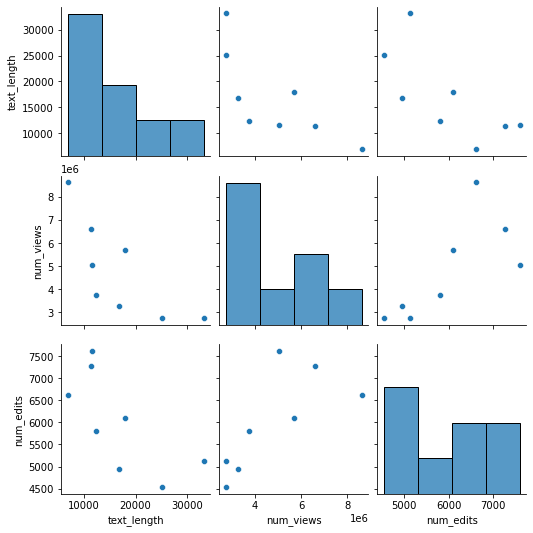

In [40]:
import seaborn as sns

sns.pairplot(data=df[["text_length", "num_views", "num_edits"]])
#gibt beziehungen zwischen text_length, num_views, und num_edits aus